In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-cp37-none-any.whl size=16443 sha256=219df64e39943786ef289f730796c19be8624dc239d2c18bab6323b0ecf93b5a
  Stored in directory: /root/.cache/pip/wheels/84/27/aa/c46d23c4e8cc72d41283862b1437e0b3ad318417e8ed7d5921
Successfully built efficientnet-pytorch


In [6]:
!pip install aicrowd-cli

In [7]:
API_KEY = "504f20af93ce87926446d56af9516dd3" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

train_images.zip: 100% 754M/754M [00:12<00:00, 58.9MB/s]
test_images.zip: 100% 33.9M/33.9M [00:00<00:00, 39.3MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 1.54MB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 755kB/s]


In [ ]:
!unzip test_images.zip
!unzip train_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/6c3093ed09.jpg  
  inflating: train_images/d457c6c055.jpg  
  inflating: train_images/29ef2e59a9.jpg  
  inflating: train_images/8a14ef0771.jpg  
  inflating: train_images/8704e89824.jpg  
  inflating: train_images/a713f70b0c.jpg  
  inflating: train_images/b212e3a08f.jpg  
  inflating: train_images/efbd9c3f78.jpg  
  inflating: train_images/1be94502d6.jpg  
  inflating: train_images/95e4dbc52b.jpg  
  inflating: train_images/741b7f61e2.jpg  
  inflating: train_images/0f4e1e287c.jpg  
  inflating: train_images/ed6f280bae.jpg  
  inflating: train_images/489302abdb.jpg  
  inflating: train_images/7c65dfa290.jpg  
  inflating: train_images/6a842c6b01.jpg  
  inflating: train_images/fe7210e4cd.jpg  
  inflating: train_images/c6d0450365.jpg  
  inflating: train_images/ba37f5f354.jpg  
  inflating: train_images/9b1632bc06.jpg  
  inflating: train_images/a2463d8e1c.jpg  
  inflating: train_images/5cfc38ecf4.jpg  
  i

In [ ]:
import numpy as np
from fastai.distributed import *
from fastai.script import *
from fastai.callbacks import *
from fastai.metrics import *
from fastai.vision import *
from fastprogress import fastprogress
import pandas as pd 
import cv2
from torchvision.models import *

# Data Augmentation


In [ ]:
data_train = pd.read_csv("./train.csv")
src = ImageList.from_df(data_train, folder="./train_images").split_by_rand_pct(0.1).label_from_df()
src.add_test_folder("test_images")
tfms = get_transforms(do_flip=True, flip_vert=False, max_zoom=1.1, 
                      max_lighting=0.2, p_affine=0.75, p_lighting=0.75)
data = (src.transform(tfms,size=224,resize_method=ResizeMethod.SQUISH).databunch(bs=128).normalize(imagenet_stats))

data.num_workers = 12

# Training

epoch,train_loss,valid_loss,accuracy,time
0,4.715266,3.132157,0.270386,00:41
1,3.196112,1.902868,0.508584,00:42
2,2.318255,1.709088,0.528970,00:42
3,1.861038,1.629425,0.574034,00:42
4,1.557208,1.566397,0.571888,00:42
5,1.324986,1.491239,0.600858,00:42
6,1.182505,1.462280,0.606223,00:42
7,1.053276,1.489818,0.599785,00:43
8,0.964229,1.474413,0.600858,00:42
9,0.907138,1.480387,0.604077,00:42


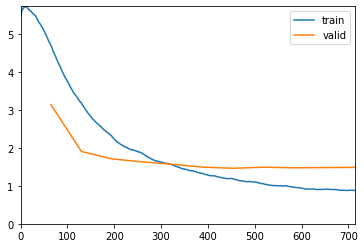

Better model found at epoch 0 with accuracy value: 0.270386278629303.
Better model found at epoch 1 with accuracy value: 0.508583664894104.
Better model found at epoch 2 with accuracy value: 0.528969943523407.
Better model found at epoch 3 with accuracy value: 0.5740343332290649.
Better model found at epoch 5 with accuracy value: 0.6008583903312683.
Better model found at epoch 6 with accuracy value: 0.6062231659889221.


In [ ]:
train = cnn_learner(data, models.densenet161, metrics=accuracy).to_parallel()
train.fit_one_cycle(15,0.0005)
# train.fit_one_cycle(11,0.0005, callbacks=[ShowGraph(train),
#                           SaveModelCallback(train, monitor='accuracy', mode='max', name="trying")])

# Test

In [ ]:
test_df = np.array(pd.read_csv("./test.csv"))
predictions_list = []

for f in testdf_files:
    img = cv2.read("./test_images/"+f)
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = pred_class.obj
    predictions_list.append(pred_class.obj)
    
answer = pd.DataFrame({'ClassName': predictions_list})


# Submission

In [9]:
answer.to_csv("./submission.csv")
!aicrowd submission create -c chunin-exams-food-track-cv-2021 -f submission.csv

submission1.csv ━━━━━━━━━━━━━━━━━━━━━ 100.0% • 9.6/8.0 KB • 373.7 kB/s • 0:00:00
                                               ╭─────────────────────────╮                                               
                                               │ Successfully submitted! │                                               
                                               ╰─────────────────────────╯                                               
                                                     Important links                                                     
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021/submissions/131496              │
│                  │                                                                                                    │
│  All submissions │ https://www.aicrowd.com/challenges/chunin-ex